<a href="https://colab.research.google.com/github/julx134/ML-AI-projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis

Count of classified chd
0    302
1    160
Name: chd, dtype: int64


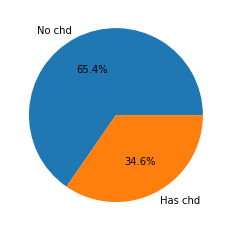

Summary of missing values:
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64 

Categorical values: famhist 

Correlation between features
                sbp   tobacco       ldl  adiposity     typea   obesity  \
sbp        1.000000  0.212247  0.158296   0.356500 -0.057454  0.238067   
tobacco    0.212247  1.000000  0.158905   0.286640 -0.014608  0.124529   
ldl        0.158296  0.158905  1.000000   0.440432  0.044048  0.330506   
adiposity  0.356500  0.286640  0.440432   1.000000 -0.043144  0.716556   
typea     -0.057454 -0.014608  0.044048  -0.043144  1.000000  0.074006   
obesity    0.238067  0.124529  0.330506   0.716556  0.074006  1.000000   
alcohol    0.140096  0.200813 -0.033403   0.100330  0.039498  0.051620   
age        0.388771  0.450330  0.311799   0.625954 -0.102606  0.291777   
chd        0.192354  0.299718  0.263053   0.254121  0.103156  0.100095   

        

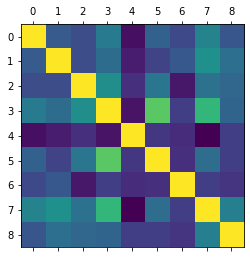

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

data = data.loc[:, data.columns != 'row.names']
print('Count of classified chd')
print(data['chd'].value_counts())
percentage = np.array([302, 160])
labels = ['No chd', 'Has chd']
plt.pie(percentage, labels=labels, autopct='%1.1f%%')
plt.show()
print('Summary of missing values:')
print(data.isna().sum(),'\n')
print('Categorical values: famhist', '\n')
print('Correlation between features')
print(data.corr())
plt.matshow(data.corr())
plt.show()



# One Hot Encoding

In [ ]:
one_hot = pd.get_dummies(data['famhist'])
data['famhist'] = pd.get_dummies(data['famhist'])['Present']

# Standardization

In [ ]:
# initialize the StandardScaler object
scaler = StandardScaler()

# get all datas but famhist and chd
standardize_features = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

# fit and transform the dataframe using the StandardScaler object
standardize_data = pd.DataFrame(scaler.fit_transform(data[standardize_features]), columns=data[standardize_features].columns)
standardize_data['famhist'] = data['famhist']
sk_X = np.array(standardize_data)
standardize_data.insert(0,'bias', 1)

# print the scaled dataframe
print(standardize_data)

# converting dataframe to numpy arrays for easier processing
X = np.array(standardize_data)
Y = np.array(data[['chd']])


     bias       sbp   tobacco       ldl  adiposity     typea   obesity  \
0       1  1.058564  1.823073  0.478412  -0.295503 -0.418470 -0.176786   
1       1  0.277089 -0.790237 -0.159680   0.412140  0.193344  0.671373   
2       1 -0.992806 -0.774980 -0.609245   0.884332 -0.112563  0.735519   
3       1  1.546985  0.842264  0.807126   1.624141 -0.214532  1.412621   
4       1 -0.211332  2.171805 -0.599577   0.305351  0.703189 -0.012856   
..    ...       ...       ...       ...        ...       ...       ...   
457     1  3.696039 -0.705234  0.599263   0.812281  1.111065  0.571590   
458     1  2.133091  0.123004 -0.159680   0.861173 -0.112563  0.609602   
459     1 -1.481228 -0.138545 -1.522877  -1.309364 -1.336191 -1.414575   
460     1 -0.992806  0.384553  3.320823   0.692625  1.111065  0.310252   
461     1 -0.309016 -0.792417  0.038515   1.029720  0.907127 -2.695129   

      alcohol       age  famhist  
0    3.277738  0.629336        1  
1   -0.612745  1.383115        0  
2   -0

# Sigmoid Function

In [ ]:
#returns probability of class = 1 (has heart disease) as float from 0 to 1.
def sigmoid(theta, x):
  z = np.matmul(X,theta)
  return (1.0 / (1.0 + np.exp(-z)))  

# Cost Function

In [ ]:
def cost(y, x, theta):
  y_hat = sigmoid(theta, x)
  cost = - np.sum(np.matmul(y.T,np.log(y_hat) + np.matmul((1-y).T,np.log(1-y_hat)))) / (( len(y))*1)
  return cost

# Batch Gradient Descent

In [ ]:
def update_theta(y_hat, y, x, alpha, theta_old):
  #print(test.shape, x.shape)
  dtheta = np.matmul((y-y_hat), x)/ len(y)
  theta_new = theta_old + alpha * dtheta
  #print(theta_new.shape)
  return theta_new

def show_model(cost_values, iterations):
  x = list(range(iterations))
  plt.scatter(x, cost_values)
  plt.title(f'Cost value vs. Gradient Descent Iteration')
  plt.xlabel('Iteration')
  plt.ylabel('Cost Value')
  plt.grid(linestyle ='--')
  plt.show()

def train_model(iterations, alpha, theta_init):
  cost_values = []
  theta = theta_init

  for i in range (iterations):
      y_hat = sigmoid(theta, X)
      current_cost = cost(Y, X,theta)
      theta_old = theta
      theta = update_theta (y_hat,Y, X, alpha, theta_old)
      cost_values.append(current_cost)

  print('Starting training with model coefficients:',theta_init,'Cost value:',cost_values[0])
  show_model(cost_values, iterations)
  print('Ended training with model coefficients:',theta,'Cost value:',cost_values[iterations-1])

def get_theta(iterations, alpha, theta_init):
  cost_values = []
  theta = theta_init

  batches = range(50, 462, 50)

  for i in range (iterations):
      y_hat = sigmoid(theta, X)
      current_cost = cost(Y, X,theta)
      theta_old = theta
      theta = update_theta (y_hat,Y, X, alpha, theta_old)
      cost_values.append(current_cost)

  return theta


# Initialization and Training

In [ ]:
random.seed(10)
theta_init=[]
for i in range(10):
  theta_init.append(random.random())

theta_init = np.array(theta_init)
y_hat = sigmoid(theta_init,X)
Y = Y.reshape(len(Y),)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.14016815891296


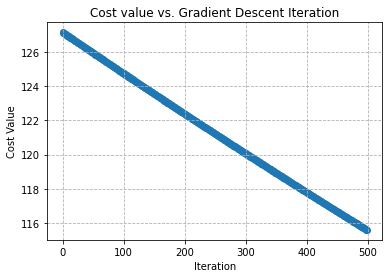

Ended training with model coefficients: [0.44865774 0.39775783 0.56874246 0.18611108 0.7362543  0.80370572
 0.56823975 0.13383282 0.49258316 0.28656358] Cost value: 115.60580333779251


In [ ]:
# 500 Iterations at 0.001 learning rate
train_model(500, 0.001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.14016815891296


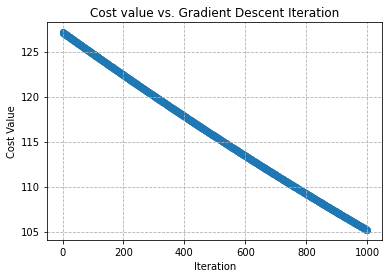

Ended training with model coefficients: [0.3334024  0.36824983 0.55934915 0.16910823 0.66457305 0.78173194
 0.48749049 0.10948637 0.46804529 0.24935346] Cost value: 105.18376611794793


In [ ]:
# 1000 Iterations at 0.001 learning rate
train_model(1000, 0.001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.14016815891296


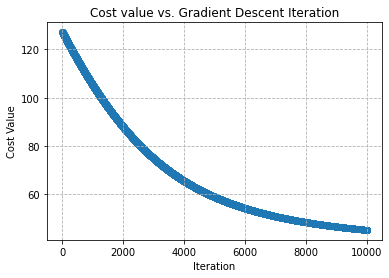

Ended training with model coefficients: [-0.63495844  0.16845824  0.44393992  0.23162362  0.21048937  0.43895911
 -0.13768631 -0.01995087  0.4636275   0.14277741] Cost value: 45.15578040500538


In [ ]:
# 10000 Iterations at 0.001 learning rate
train_model(10000, 0.001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.14016815891296


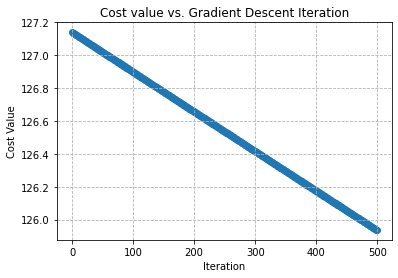

Ended training with model coefficients: [0.55880515 0.42571412 0.57716192 0.20397547 0.80539108 0.82170143
 0.64476592 0.15750553 0.51770953 0.32347971] Cost value: 125.9372084955482


In [ ]:
# 500 Iterations at 0.0001 learning rate
train_model(500, 0.0001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.14016815891296


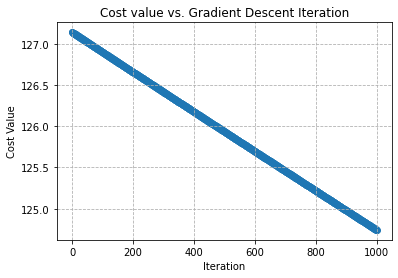

Ended training with model coefficients: [0.54627826 0.42255191 0.57623099 0.20187928 0.79750884 0.81979101
 0.63609841 0.15479953 0.5147825  0.31922418] Cost value: 124.74272905217073


In [ ]:
# 1000 Iterations at 0.0001 learning rate
train_model(1000, 0.0001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.14016815891296


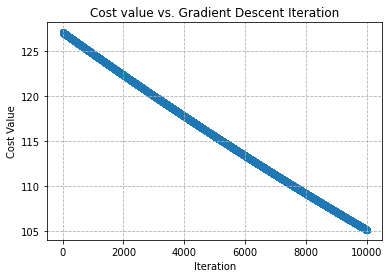

Ended training with model coefficients: [0.33341493 0.36825247 0.559349   0.16911304 0.66458191 0.78172885
 0.48749803 0.1094898  0.46805094 0.24936007] Cost value: 105.16721557724452


In [ ]:
# 10000 Iterations at 0.0001 learning rate
train_model(10000, 0.0001, theta_init)

# Early Stoppage

For learning rate of 0.001, we can stop training after 10,000 iterations as the slope of the cost function starts to plateau. For learning rate of 0.0001, we have to increase the number of iterations to more than 10,000 because the algorithm is learining too slowly (i.e. the slope of the cost function is still too steep).

# Mini-batch Gradient Descent

In [ ]:
def update_theta_batches(y_hat, y, x, alpha, theta_old):
  dtheta = np.dot((y-y_hat), x)/ len(y)
  theta_new = theta_old + alpha * dtheta
  return theta_new



def train_model_batches(iterations, alpha, theta_init):
  cost_values = []
  theta = theta_init
  
  batches = range(50, 462, 50)

  for i in range (iterations):
    old_n = 0
    for n in batches:
      X_new = X[old_n:n]
      Y_new = Y[old_n:n]
      y_hat = sigmoid(theta, X_new)[old_n:n]
      theta_old = theta
      theta = update_theta_batches(y_hat,Y_new, X_new, alpha, theta_old)
      old_n = n
    
    #final batch
    X_new = X[old_n:old_n+12]
    Y_new = Y[old_n:n+12]
    y_hat = sigmoid(theta, X_new)[old_n:n+12]
    theta_old = theta
    theta = update_theta_batches(y_hat,Y_new, X_new, alpha, theta_old)
    current_cost = cost(Y, X,theta)
    cost_values.append(current_cost)
    
  print('Starting training with model coefficients:',theta_init,'Cost value:',cost_values[0])
  show_model(cost_values, iterations)
  print('Ended training with model coefficients:',theta,'Cost value:',cost_values[iterations-1])

def get_theta_batches(iterations, alpha, theta_init):
  cost_values = []
  theta = theta_init
  
  batches = range(50, 462, 50)

  for i in range (iterations):
    old_n = 0
    for n in batches:
      X_new = X[old_n:n]
      Y_new = Y[old_n:n]
      y_hat = sigmoid(theta, X_new)[old_n:n]
      theta_old = theta
      theta = update_theta_batches(y_hat,Y_new, X_new, alpha, theta_old)
      old_n = n
    
    #final batch
    X_new = X[old_n:old_n+12]
    Y_new = Y[old_n:n+12]
    y_hat = sigmoid(theta, X_new)[old_n:n+12]
    theta_old = theta
    theta = update_theta_batches(y_hat,Y_new, X_new, alpha, theta_old)
    current_cost = cost(Y, X,theta)
    cost_values.append(current_cost)
  return theta

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 126.8928790005368


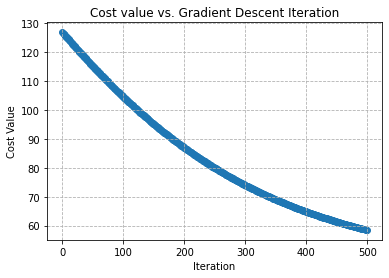

Ended training with model coefficients: [-0.29270016  0.13279843  0.49526816  0.10700684  0.33369546  0.5090979
  0.02933065  0.0150519   0.37261945  0.09459568] Cost value: 58.50012079406655


In [ ]:
# 500 Iterations at 0.001 learning rate
train_model_batches(500, 0.001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 126.8928790005368


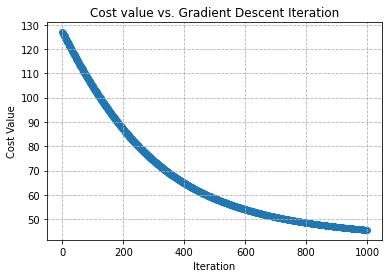

Ended training with model coefficients: [-0.60467842  0.08106574  0.43566332  0.18478828  0.27668295  0.34060298
 -0.15676783 -0.00677385  0.42120236  0.13441793] Cost value: 45.55867710105407


In [ ]:
# 1000 Iterations at 0.001 learning rate
train_model_batches(1000, 0.001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 126.8928790005368


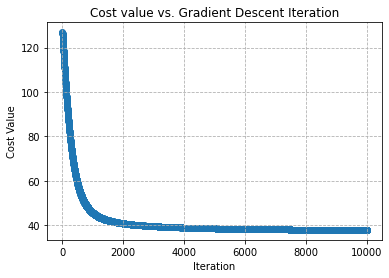

Ended training with model coefficients: [-1.14100462  0.07726899  0.34146863  0.28802577  0.36216185  0.27385507
 -0.3756796   0.01350306  0.50584225  0.81046723] Cost value: 37.87680048983795


In [ ]:
train_model_batches(10000, 0.001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.11542126284243


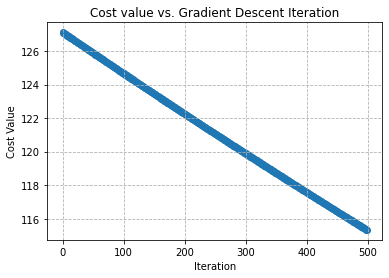

Ended training with model coefficients: [0.45027496 0.38411069 0.56940498 0.17879134 0.73453843 0.79430286
 0.56383598 0.13729882 0.48827694 0.28569867] Cost value: 115.33254556267688


In [ ]:
train_model_batches(500, 0.0001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.11542126284243


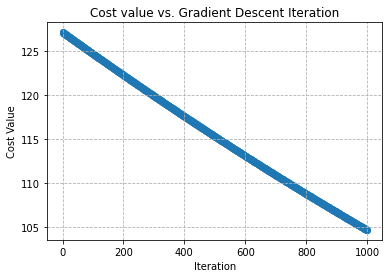

Ended training with model coefficients: [0.33629886 0.34185983 0.56061006 0.15530623 0.66198302 0.76314079
 0.4792444  0.11598573 0.45977142 0.2475603 ] Cost value: 104.7034932755171


In [ ]:
train_model_batches(1000, 0.0001, theta_init)

Starting training with model coefficients: [0.57140259 0.42888905 0.5780913  0.20609823 0.81332125 0.82358887
 0.65347253 0.16022956 0.52066936 0.32777281] Cost value: 127.11542126284243


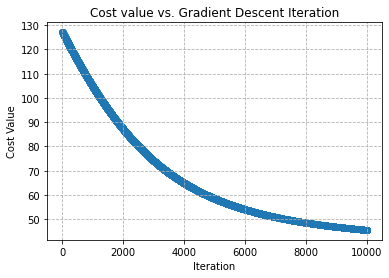

Ended training with model coefficients: [-0.60462653  0.08105463  0.43568013  0.18480904  0.27666809  0.34070736
 -0.15671124 -0.00673887  0.42121987  0.13442686] Cost value: 45.561116431004095


In [ ]:
train_model_batches(10000, 0.0001, theta_init)

# Early Stoppage

For learning rate of 0.001, we can stop training after 1,000 iterations as the slope of the cost function starts to plateau. For learning rate of 0.0001, we have to increase the number of iterations to more than 10,000 because the algorithm is learining too slowly (i.e. the slope of the cost function is still too steep).

# Scikitlearn

[-1.14100462  0.07726899  0.34146863  0.28802577  0.36216185  0.27385507
 -0.3756796   0.01350306  0.50584225  0.81046723]
[-0.63495844  0.16845824  0.44393992  0.23162362  0.21048937  0.43895911
 -0.13768631 -0.01995087  0.4636275   0.14277741]


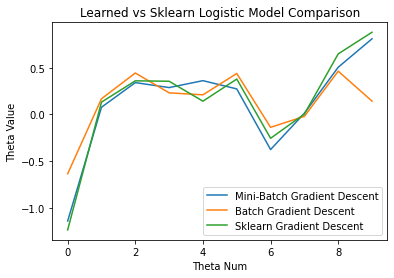

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(sk_X,Y)

#sk = np.array(model.intercept_).append(model.coef_)
sk = np.append(model.intercept_, model.coef_)
test = np.array(get_theta_batches(10000, 0.001, theta_init))
print(test)
test2 = np.array(get_theta(10000, 0.001, theta_init))
print(test2)

x_test = range(10)
plt.plot(x_test, test, label ='Mini-Batch Gradient Descent')
plt.plot(x_test, test2, label = 'Batch Gradient Descent')
plt.plot(x_test, sk, label = 'Sklearn Gradient Descent')
plt.title('Learned vs Sklearn Logistic Model Comparison')
plt.legend()
plt.xlabel('Theta Num')
plt.ylabel('Theta Value')
plt.show()

# Comparison Results
In the graph above, we can see that the mini-batch training for logistic regression coincided with the sklearn logistic model best. The batch gradient descent model still performs well but it is still not the most optimal as seen in the graph. The reason for the mini-batch model fitting more optimally like sklearn is because of the number of iterations the mini batch goes through. In general, the iterations essentially 9x from the epoch hyper-parameter